In [29]:
import warnings
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.metrics import classification_report

ImportError: cannot import name 'classification_report' from 'tensorflow.keras.metrics' (C:\Users\Eyüp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\api\_v2\keras\metrics\__init__.py)

In [2]:
def new_column_names(df_copy):
    column_list = ['label']
    row, column = 1,1;
    while row < 29:
        while column < 29:
            column_name = str(row) + 'x' + str(column)
            column_list.append(column_name)
            column+=1
        row+=1;
        if(column == 29):
            column = 1
            
    df_copy.columns = column_list
    return df_copy

def split_dataset_to_train_test_validation(df_copy, train_sze, test_sze, validation_sze):
    random.seed(0)
    target_column = ['label']
    predictors = list(set(list(df.columns))-set(target_column))
    X = df_copy[predictors] #Contains all columns
    Y = df_copy[['label']]
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, train_size=train_sze, random_state=50)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_temp, Y_temp, train_size=test_sze/(test_sze+validation_sze), random_state=50)
    return X_train, Y_train, X_test, Y_test, X_validation, Y_validation

def normalizer(dataframe):
    result = dataframe.copy()/255
    return result

def model():
    inputs = Input(shape=(28,28,1))
    Conv2D(24,kernel_size=(3,3),padding='same',activation="relu", input_shape = (28,28,1))
    MaxPooling2D(pool_size=(2, 2))
    Conv2D(48, (3, 3), padding='same',activation='relu', input_shape = (28,28,1))
    MaxPooling2D(pool_size=(2, 2))
    Conv2D(64, (3, 3), padding='same',activation='relu', input_shape = (28,28,1))
    MaxPooling2D(pool_size=(2, 2))
    Flatten()
    Dense(128, activation='relu')
    Dropout(0.25)
    output = Dense(10,activation="softmax")
    
    model = Model(inputs,output)
    
    model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

def sequential_model():
    model = Sequential()
    
    inputs = Input(shape=(28,28,1))
    
    model.add(Dense(784,activation='sigmoid'))
    
    model.add(Conv2D(24,kernel_size=(3,3),padding='same',activation="relu", input_shape = inputs))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(48, (3, 3), padding='same',activation='relu', input_shape = inputs))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu', input_shape = inputs))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(Flatten())
    
    Dense(128, activation='relu')
    
    model.compile(loss='hinge', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

In [3]:
warnings.filterwarnings('ignore')

In [35]:
model = Sequential()
    
model.add(Dense(784,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

In [14]:
df_train = pd.read_csv('MNIST_TRAIN.csv')
df_test = pd.read_csv('MNIST_TEST.csv')

In [15]:
print('Numbers of NaN values in training set: '); print(df_train.isnull().sum().sum()); 
print('Numbers of NaN values in test set: '); print(df_test.isnull().sum().sum());
#print(df_train); print(df_test);

Numbers of NaN values in training set: 
0
Numbers of NaN values in test set: 
0


In [16]:
X_train = df_train.drop('label', axis = 1)
Y_train = df_train[['label']]

X_test = df_test.drop('label', axis = 1)
Y_test = df_test[['label']]

X_train = normalizer(X_train); X_test = normalizer(X_test)

In [17]:
Y_train_modified = Y_train.to_numpy()
Y_test_modified = Y_test.to_numpy()

Y_train_modified = np.sort(Y_train_modified, axis=0, kind = 'mergesort')
Y_test_modified = np.sort(Y_test_modified, axis=0, kind = 'mergesort')

print(np.array(np.unique(Y_train_modified, return_counts=True)))
print(np.array(np.unique(Y_test_modified, return_counts=True)))

[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]
[[   0    1    2    3    4    5    6    7    8    9]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]]


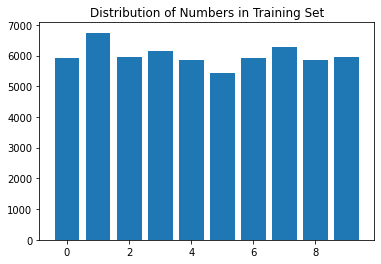

In [18]:
plt.title('Distribution of Numbers in Training Set')
plt.bar(np.array(np.unique(Y_train_modified, return_counts=True))[0], np.array(np.unique(Y_train_modified, return_counts=True))[1])
plt.show()

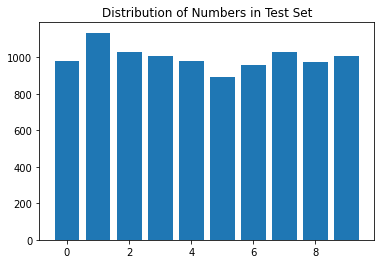

In [19]:
plt.title('Distribution of Numbers in Test Set')
plt.bar(np.array(np.unique(Y_test_modified, return_counts=True))[0], np.array(np.unique(Y_test_modified, return_counts=True))[1])
plt.show()

In [20]:
model.fit(X_train.values, Y_train.values)

1875/1875 [==============================] - 20s 10ms/step - loss: 0.1008 - accuracy: 0.0904


In [25]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

313/313 [==============================] - 1s 5ms/step


In [36]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 28.4315 - accuracy: 0.1026


[28.43147087097168, 0.1025666669011116]